In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [97]:
def make_pred(x, w, b):
    return np.matmul(x, w) + b

def compute_cost(x, y, w, b):
    sqr_diff = (make_pred(x, w, b) - y)**2
    return sqr_diff.sum() / (2*x.shape[0])

def run_grad_decent(x, y, w, b, alpha):
    cost_sum = ((make_pred(x, w, b)-y).sum() / x.shape[1])
    new_b = b - alpha * cost_sum

    j = x.shape[1]
    i = x.shape[0]

    preds = x*(np.matmul(x, w) + b - y)
    new_w = np.sum(preds, axis=0)

    new_w /= i
    new_w = w - (alpha * new_w.reshape([j, 1]))

    return new_w, new_b

def run_linear_regression(x, y, alpha = .004, iter = int(1e3)*2):    
    update_alpha = True
    j = x.shape[1]
    w = np.zeros([j, 1])
    b = 0
    cost_history = []
    print(b)
    cost_history.append(compute_cost(x, y, w, b))
    print(cost_history[-1])
    for _ in range(iter):
        new_w, new_b = run_grad_decent(x, y, w, b, alpha)
        cost_history.append(compute_cost(x, y, new_w, new_b))
        if cost_history[-1] >= cost_history[-2]:
            alpha -= .001
            update_alpha = False
            new_w, new_b = w, b
            print("not decreasing")
            cost_history.pop()
        elif update_alpha:
            alpha += .001

        #print("alpha:", alpha)
        #print("cost:", cost_history[-1])
        w, b = new_w, new_b
    print(compute_cost(x, y, w, b))
    return w, b, cost_history 

0
1.4051423544996315
not decreasing
0.9044157801171571
0
1.4051423544996315
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
0.9051073977581833
0
1.4051423544996315
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing
not decreasing

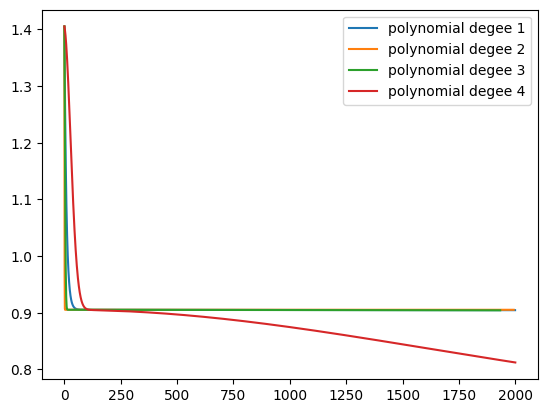

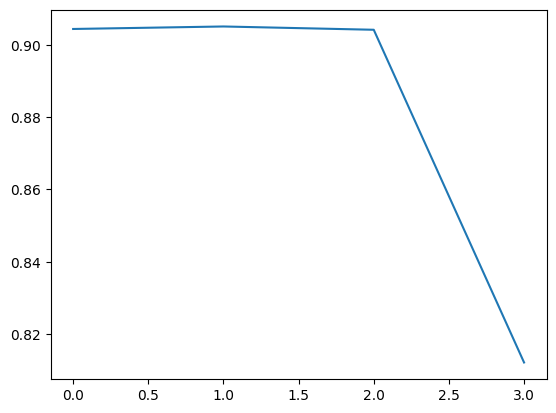

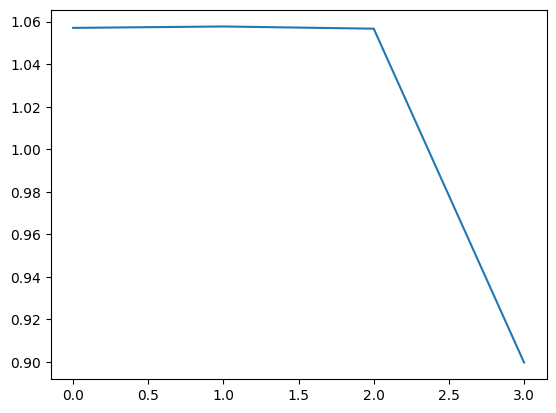

In [98]:
def import_data_set():
    # Grab dataset from file
    car_dataframe = pd.read_csv("data/car details v4.csv")
    data = (car_dataframe.loc[:, ["Fuel Tank Capacity", "Year", "Price"]]).to_numpy().astype('float64')
    return data

def create_data_sets(data):
    # Use simple data cleaning of dropping all null data
    data_clean = data[~np.isnan(data).any(axis=1)]

    # Suffle data insure equal distabution between train, validation, and test sets (Also use seed to insure determinisum)
    rng = np.random.default_rng(seed=42)
    rng.shuffle(data_clean)

    # Split up data set into train, validation, and test
    train_set_end_index = int(data_clean.shape[0]/2)
    validation_set_end_index = int(3*data_clean.shape[0]/4)
    train_set = data_clean[:train_set_end_index]
    validation_set = data_clean[train_set_end_index:validation_set_end_index]
    test_set = data_clean[validation_set_end_index:]

    train_set_inputs = train_set[:, :2]
    train_set_targets = train_set[:, 2:]
    validation_set_inputs = validation_set[:, :2]
    validation_set_targets = validation_set[:, 2:]
    test_set_inputs = test_set[:, :2]
    test_set_targets = test_set[:, 2:]

    return train_set_inputs, train_set_targets, validation_set_inputs, validation_set_targets, test_set_inputs, test_set_targets

def normalize_datasets(train_set_inputs, train_set_targets, validation_set_inputs, validation_set_targets, test_set_inputs, test_set_targets):
    normalized_train_set_inputs = train_set_inputs
    normalized_validation_set_inputs = validation_set_inputs
    normalized_test_set_inputs = test_set_inputs

    for j in range(train_set_inputs.shape[1]):
        train_set_column = normalized_train_set_inputs[:, j:j+1]
        validation_set_column = normalized_validation_set_inputs[:, j:j+1]
        test_set_column = normalized_test_set_inputs[:, j:j+1]

        sigma = train_set_column.std()
        mean = train_set_column.mean()

        normalized_train_set_inputs[:, j:j+1] = (train_set_column - mean) / sigma / 100
        normalized_validation_set_inputs[:, j:j+1] = (validation_set_column - mean) / sigma / 100
        normalized_test_set_inputs[:, j:j+1] = (test_set_column - mean) / sigma / 100
        
    train_set_targets_mean = train_set_targets.mean()

    normalized_train_set_targets = train_set_targets / train_set_targets_mean
    normalized_validation_set_targets = validation_set_targets / train_set_targets_mean
    normalized_test_set_targets = test_set_targets / train_set_targets_mean

    return normalized_train_set_inputs, normalized_train_set_targets, normalized_validation_set_inputs, normalized_validation_set_targets, normalized_test_set_inputs, normalized_test_set_targets 

def get_next_polynomial_set(normalized_trained_inputs):
    num_of_examples = normalized_trained_inputs.shape[0]
    num_of_inputs = normalized_trained_inputs.shape[1]

    next_polynomal_set = np.empty([num_of_examples, num_of_inputs**2+num_of_inputs])

    for i in range(num_of_examples):
        for j in range(num_of_inputs):
            next_polynomal_set[i, j] = normalized_trained_inputs[i, j]

    for i in range(num_of_examples):
        index = 0
        for j in range(num_of_inputs):
            for k in range(num_of_inputs):
                next_polynomal_set[i, index+num_of_inputs] = normalized_trained_inputs[i, j] * normalized_trained_inputs[i, k]
                index += 1
            
    return next_polynomal_set 


def create_polynomial_datasets(normalized_train_set_inputs, normalized_validation_set_inputs, normalized_test_set_inputs, polynomial_degree):
    normalized_polynomial_train_set_targets = [normalized_train_set_inputs]
    normalized_polynomial_validation_set_inputs = [normalized_validation_set_inputs]
    normalized_polynomial_test_set_inputs = [normalized_test_set_inputs]

    for _i in range(polynomial_degree-1):
        normalized_polynomial_train_set_targets.append(get_next_polynomial_set(normalized_polynomial_train_set_targets[-1]))
        normalized_polynomial_validation_set_inputs.append(get_next_polynomial_set(normalized_polynomial_validation_set_inputs[-1]))
        normalized_polynomial_test_set_inputs.append(get_next_polynomial_set(normalized_polynomial_test_set_inputs[-1]))

    scaling_factor = 1000

    for i in range(1, len(normalized_polynomial_train_set_targets)):
        train_set_targets = normalized_polynomial_train_set_targets[i]
        validation_set_targets = normalized_polynomial_validation_set_inputs[i]
        test_set_targets = normalized_polynomial_test_set_inputs[i]
        
        num_of_targets = train_set_targets.shape[1]
        for j in range(num_of_targets):
            mean = train_set_targets[:, j:j+1].mean()
            sigma = train_set_targets[:, j:j+1].std()

            train_set_targets[:, j:j+1] = (train_set_targets[:, j:j+1] - mean) / sigma / scaling_factor
            validation_set_targets[:, j:j+1] = (validation_set_targets[:, j:j+1] - mean) / sigma / scaling_factor
            test_set_targets[:, j:j+1] = (test_set_targets[:, j:j+1] - mean) / sigma / scaling_factor
        
    return normalized_polynomial_train_set_targets, normalized_polynomial_validation_set_inputs, normalized_polynomial_test_set_inputs

data_set = import_data_set()

train_set_inputs, train_set_targets, validation_set_inputs, validation_set_targets, test_set_inputs, test_set_targets = create_data_sets(data_set)
normalized_train_set_inputs, normalized_train_set_targets, normalized_validation_set_inputs, normalized_validation_set_targets, normalized_test_set_inputs, normalized_test_set_targets  = normalize_datasets(train_set_inputs, train_set_targets, validation_set_inputs, validation_set_targets, test_set_inputs, test_set_targets)

polynomial_degree = 4

normalized_polynomial_train_set_targets, normalized_polynomial_validation_set_inputs, normalized_polynomial_test_set_inputs = create_polynomial_datasets(normalized_train_set_inputs, normalized_validation_set_inputs, normalized_test_set_inputs, polynomial_degree)

cost_histories = []
learned_wb = []

for i in range(polynomial_degree):
    w, b, cost_history = run_linear_regression(normalized_polynomial_train_set_targets[i], normalized_train_set_targets)
    learned_wb.append((w,b))
    cost_histories.append(cost_history)

for i in range(len(cost_histories)):
    x = cost_histories[i]
    plt.plot(x, label = f"polynomial degee {i+1}") 

plt.legend()
plt.show()

final_cost = []

for i in range(len(cost_histories)):
    final_cost.append(cost_histories[i][-1])

plt.plot(final_cost) 
plt.show()

validation_set_costs = []

for i in range(polynomial_degree):
    w, b = learned_wb[i]
    cost = compute_cost(normalized_polynomial_validation_set_inputs[i], normalized_validation_set_targets, w, b)
    validation_set_costs.append(cost)

plt.plot(validation_set_costs) 
plt.show()

print(compute_cost(normalized_polynomial_test_set_inputs[-1], normalized_test_set_targets, w, b))


In [99]:
a = [np.zeros([10, 10])]
for i in range(len(a)):
    z = a[i]
    y = z[0]
    z = y[1]
    z = 100

print(a)

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])]
